# Import Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Import Data

In [11]:
data=pd.read_csv('EastWestAirlines1.csv')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [12]:
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [13]:
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [14]:
data1=data.drop(['ID#'],axis=1)
data1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


# Hierarchical Clustering

In [15]:
data1_norm=pd.DataFrame(normalize(data1),columns=data1.columns)
data1_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


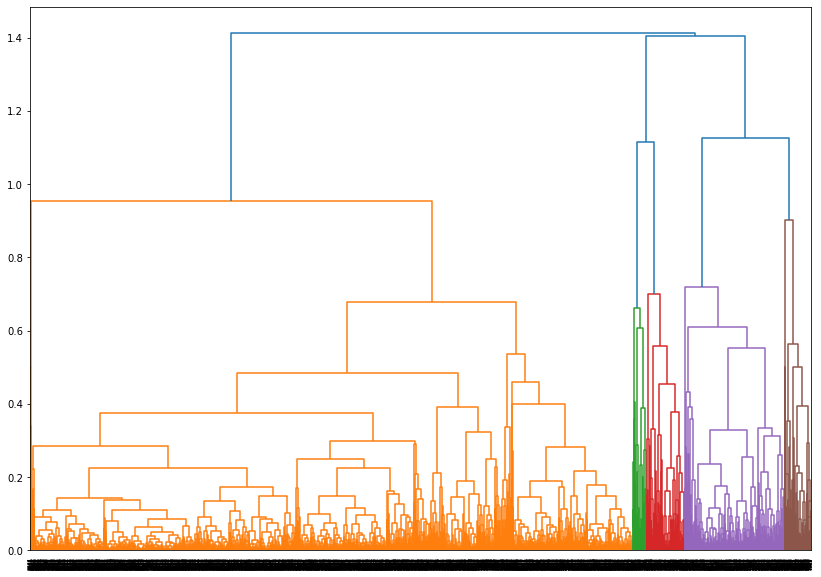

In [16]:
plt.figure(figsize=(14, 10))  
dendograms=sch.dendrogram(sch.linkage(data1_norm,'complete'))

In [17]:
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [18]:
y=pd.DataFrame(hclusters.fit_predict(data1_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [19]:
data1['clustersid']=hclusters.labels_
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [20]:
data1.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


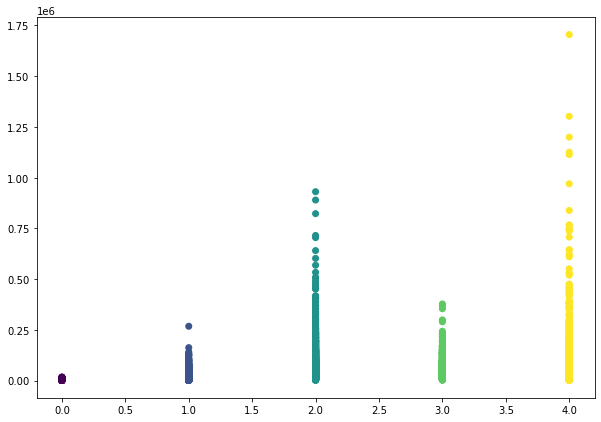

In [21]:
plt.figure(figsize=(10, 7))  
plt.scatter(data1['clustersid'],data1['Balance'], c=hclusters.labels_) 

# K Means Clustering

In [22]:
data1_norm=StandardScaler().fit_transform(data1)

In [23]:
clusters1=KMeans(4,random_state=30).fit(data1_norm)
clusters1

KMeans(n_clusters=4, random_state=30)

In [24]:
clusters1.labels_

array([2, 2, 2, ..., 1, 2, 2])

In [25]:
data2=data1.copy()
data2['clusters1id']=clusters1.labels_
data2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters1id
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,2
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,2
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2


In [26]:
clusters1.cluster_centers_

array([[ 1.22487855e+00,  8.12025981e-01,  9.67906164e-02,
         1.46587344e-01, -6.27665798e-02,  6.58132582e-01,
         1.60980622e+00,  3.50937988e+00,  3.78816611e+00,
         3.12881254e-01,  9.29670426e-01,  2.22289070e-01],
       [ 3.96853429e-01,  6.10942643e-03,  1.17234074e+00,
        -7.24081391e-02, -5.49519018e-02,  8.83288461e-01,
         7.38652231e-01, -9.47939795e-02, -1.06548016e-01,
         3.49252376e-01,  5.47296388e-01, -3.11607571e-01],
       [-2.92461298e-01, -5.64576294e-02, -6.25583254e-01,
         2.87463899e-02, -6.07232925e-02, -5.24506003e-01,
        -5.03119312e-01, -1.83000217e-01, -1.95471303e-01,
        -2.04789087e-01, -3.49778127e-01,  1.51480358e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01, -5.42914506e-01]])

In [27]:
data2.groupby('clusters1id').agg(['mean']).reset_index()

,clusters1id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,196974.739394,776.951515,2.175758,1.036364,1.000000,32470.169697,26.951515,5392.236364,15.775758,4747.024242,0.818182,2.775758
1,1,113702.644767,149.067991,3.676853,1.003820,1.001528,38598.149733,18.724981,329.177998,0.977846,4844.609626,0.635600,2.142857
2,2,44192.507570,100.320717,1.200000,1.018725,1.000398,4490.345020,6.779681,203.804781,0.631873,3695.640637,0.201594,2.692032
3,3,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.866667


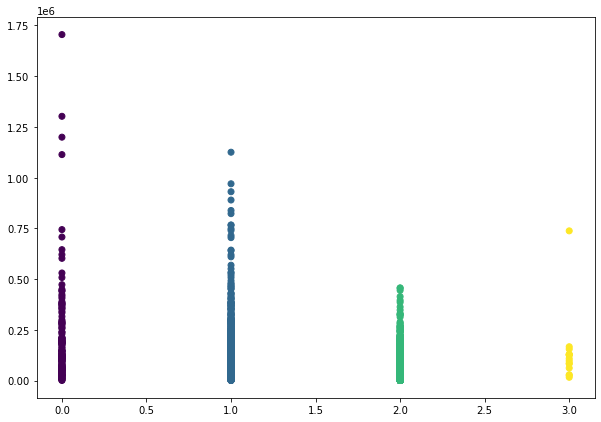

In [28]:
plt.figure(figsize=(10, 7))  
plt.scatter(data2['clusters1id'],data2['Balance'], c=clusters1.labels_) 

In [29]:
#k = 6
data2_norm=StandardScaler().fit_transform(data2)

In [30]:
clusters2=KMeans(5,random_state=30).fit(data2_norm)
clusters2

KMeans(n_clusters=5, random_state=30)

In [31]:
clusters2.labels_

array([0, 1, 1, ..., 4, 0, 1])

In [32]:
data3=data2.copy()
data3['clusters2id']=clusters2.labels_
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters1id,clusters2id
0,28143,0,1,1,1,174,1,0,0,7000,0,4,2,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,2,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,2,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,2,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,2,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,2,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,4
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,2,0


In [33]:
clusters2.cluster_centers_

array([[-9.72995348e-02,  2.72894892e-02, -7.21369349e-01,
        -9.82418871e-02, -6.27665798e-02, -6.02972915e-01,
        -7.48611734e-01, -1.67090124e-01, -1.65236126e-01,
        -3.25867130e-01, -4.07729793e-01,  1.20398434e+00,
         7.05644234e-01],
       [-4.51214363e-01, -1.25359591e-01, -5.44993787e-01,
         1.42096149e-01, -5.90572956e-02, -4.58799105e-01,
        -2.99009400e-01, -1.95250759e-01, -2.19357533e-01,
        -1.05906204e-01, -3.00568502e-01, -7.12023845e-01,
         7.04386011e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01, -5.42914506e-01,
         2.44324971e+00],
       [ 1.22439123e+00,  8.18076433e-01,  8.44328581e-02,
         1.48071158e-01, -6.27665798e-02,  6.34642889e-01,
         1.59848369e+00,  3.52290036e+00,  3.79733998e+00,
         3.04359562e-01,  9.27402258e

In [34]:
data3.groupby('clusters2id').agg(['mean']).reset_index()

,clusters2id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusters1id
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,63797.128319,165.224779,1.066372,1.000000,1.000000,2584.287611,4.413274,226.123894,0.746903,3445.684071,0.173451,3.945133,2.000000
1,1,28135.585807,47.140478,1.309196,1.035482,1.000724,6065.789283,8.730630,186.698045,0.541636,3899.876177,0.225199,1.665460,1.999276
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.866667,3.000000
3,3,196974.739394,776.951515,2.175758,1.036364,1.000000,32470.169697,26.951515,5392.236364,15.775758,4747.024242,0.818182,2.775758,0.000000
4,4,113772.138379,149.181957,3.678899,1.002294,1.001529,38607.525994,18.718654,328.053517,0.974006,4845.795107,0.635321,2.143731,1.000000


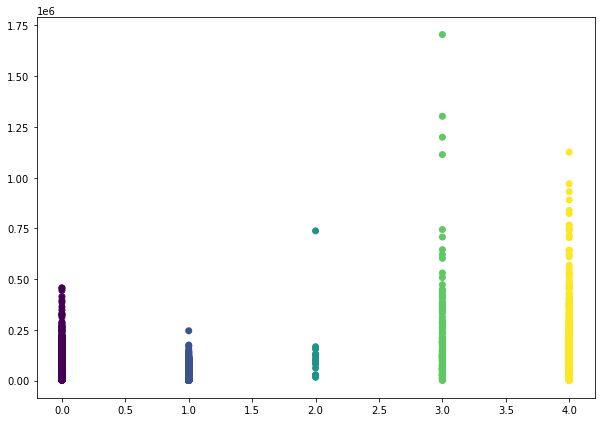

In [35]:
plt.figure(figsize=(10, 7))  
plt.scatter(data3['clusters2id'],data3['Balance'], c=clusters2.labels_)

# DBSCAN Clustering

In [36]:
data1_norm=StandardScaler().fit_transform(data)
data1_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [37]:
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(data1_norm)

DBSCAN(eps=1, min_samples=4)

In [38]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [39]:
data['clusters']=dbscan.labels_
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [40]:
data.groupby('clusters').agg(['mean']).reset_index()

,clusters,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,1737.833052,177646.939292,899.406408,2.701518,1.062395,1.082631,39019.816189,21.784148,2120.370995,6.134907,4652.507589,0.686341
1,0,2178.729212,53148.905529,2.084023,1.660427,1.000000,1.000000,9033.232477,8.449717,116.498041,0.380932,3811.440139,0.000000
2,1,1799.892351,61006.745987,5.796034,2.605288,1.000000,1.000000,22850.425873,12.799811,245.526912,0.761095,4513.312559,1.000000
3,2,1382.750000,35251.500000,1058.750000,1.000000,1.000000,1.000000,1297.500000,1.250000,0.000000,0.000000,5047.250000,0.000000
4,3,1324.285714,65419.714286,0.000000,1.000000,1.000000,1.000000,6984.000000,11.571429,2905.571429,9.142857,5171.857143,1.000000
5,4,1363.000000,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
6,5,2557.230769,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
7,6,1830.500000,32730.750000,0.000000,1.000000,3.000000,1.000000,14267.750000,13.250000,62.500000,0.250000,4396.500000,0.000000
8,7,2672.000000,81738.000000,0.000000,1.000000,1.000000,1.000000,11860.750000,13.500000,1755.250000,9.500000,2807.250000,1.000000


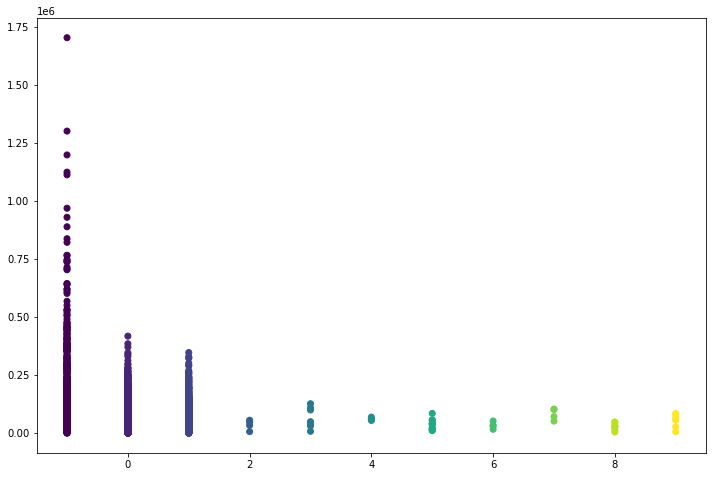

In [41]:
plt.figure(figsize=(12, 8))  
plt.scatter(data['clusters'],data['Balance'], c=dbscan.labels_) 